In [1]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv("../raw_data/data_2021-31-08-cleaned_newds_gd.csv", converters={'masc_words_list': eval, 'fem_words_list': eval})

In [30]:
data

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,"['border', 'patrol', 'agents', 'prevent', 'ter...","[women, protect, competitive, based, must, air...","[relies, response, willing, responding, respon...",11,10,"['Border ', 'Patrol ', 'Agents ', 'prevent ', ...",52.0,48.0,neutral
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,"['gap', 'brands', 'bridge', 'gaps', 'see', 'wo...","[athleta, republic, individuality, decisions, ...","[sustainable, responsibly, communities, learn,...",16,13,"['About ', 'Gap ', 'Inc. ', 'Our ', 'brands ',...",55.0,45.0,masculine
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,"['county', 'san', 'diego', 'invites', 'resumes...","[individuals, encouraged, must, must, second]","[duties, depending, committed]",5,3,"['The ', 'County ', 'of ', 'San ', 'Diego ', '...",62.0,37.0,masculine
3,3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA","['application', 'deadline', 'application', 'de...",[],[],0,0,"['Application ', 'Deadline ', 'Application ', ...",0.0,0.0,masculine


In [36]:
data['list_for_annotation'][3]

"['Application ', 'Deadline ', 'Application ', 'Deadline ', 'Extended: ', 'Friday, ', 'September ', '10, ', '2021 ', 'at ', '4:00 ', 'p.m. ', 'Job ', 'Flyer ', 'Click ', 'here ', 'to ', 'view ', 'the ', 'Code ', 'Enforcement ', 'Officer ', 'job ', 'flyer. ', 'Click ', 'here ', 'to ', 'view ', 'the ', 'Full-Time ', 'Employment ', 'Benefits. ', 'Click ', 'here ', 'to ', 'view ', 'the ', 'Code ', 'Enforcement ', 'Officer ', 'job ', 'description. ']"

In [5]:
data.groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,,,,
"City of Malibu, CA",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
County of San Diego,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Gap Inc.,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
U.S. Customs and Border Protection,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

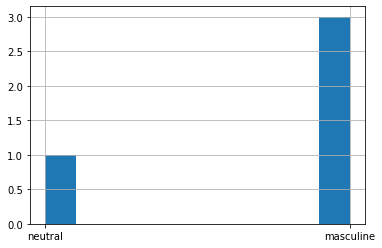

In [6]:
data['gender'].hist()

<AxesSubplot:>

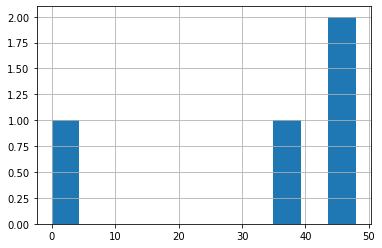

In [7]:
data['fem_coded'].hist(bins=11)

<AxesSubplot:>

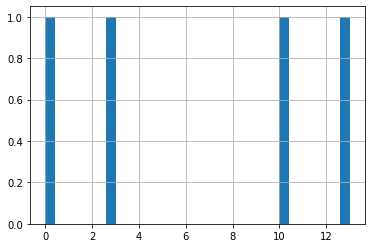

In [8]:
data['fem_words'].hist(bins=30)

<AxesSubplot:>

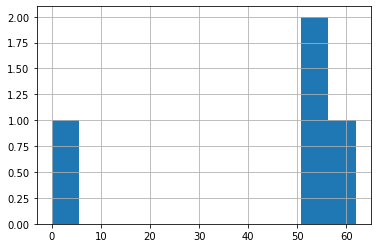

In [9]:
data['masc_coded'].hist(bins=11)

<AxesSubplot:>

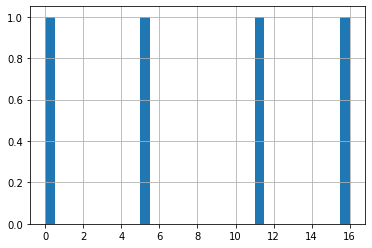

In [10]:
data['masc_words'].hist(bins=32)

In [11]:
data[data['gender'] == 'feminine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,,,,


In [12]:
data[data['gender'] == 'masculine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,,,,
"City of Malibu, CA",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
County of San Diego,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Gap Inc.,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
data[data['gender'] == 'neutral'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,,,,
U.S. Customs and Border Protection,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
data[data['company_name'] == 'TikTok'].groupby('gender').count()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded
gender,,,,,,,,,,,,,,,,


In [15]:
data[data['gender'] == 'feminine'].sort_values(['fem_coded', 'fem_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [16]:
data[data['company_name'] == 'PM Pediatrics']

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [17]:
data[data['company_name'] == 'San Antonio Regional Hospital']

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [18]:
data[data['company_name'] == "Trader Joe's"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [19]:
data[data['gender'] == 'masculine'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,"['county', 'san', 'diego', 'invites', 'resumes...","[individuals, encouraged, must, must, second]","['duties', 'depending', 'committed']",5,3,"['The ', 'County ', 'of ', 'San ', 'Diego ', '...",62.0,37.0,masculine
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,"['gap', 'brands', 'bridge', 'gaps', 'see', 'wo...","[athleta, republic, individuality, decisions, ...","['sustainable', 'responsibly', 'communities', ...",16,13,"['About ', 'Gap ', 'Inc. ', 'Our ', 'brands ',...",55.0,45.0,masculine
3,3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA","['application', 'deadline', 'application', 'de...",[],[],0,0,"['Application ', 'Deadline ', 'Application ', ...",0.0,0.0,masculine


In [20]:
data[data['company_name'] == "Scorpion Internet Marketing"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [21]:
data[data['company_name'] == "Goodwill Industries of South Texas"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [22]:
data[data['company_name'] == "Los Angeles Unified School District"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender


In [23]:
data[data['gender'] == 'neutral'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words_list,fem_words_list,masc_words,fem_words,list_for_annotation,masc_coded,fem_coded,gender
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,"['border', 'patrol', 'agents', 'prevent', 'ter...","[women, protect, competitive, based, must, air...","['relies', 'response', 'willing', 'responding'...",11,10,"['Border ', 'Patrol ', 'Agents ', 'prevent ', ...",52.0,48.0,neutral


In [24]:
data.columns

Index(['Unnamed: 0', 'job_id', 'url', 'loc', 'company_name', 'job_title',
       'job_description', 'company_url', 'clean_description',
       'masc_words_list', 'fem_words_list', 'masc_words', 'fem_words',
       'list_for_annotation', 'masc_coded', 'fem_coded', 'gender'],
      dtype='object')

In [25]:
import ast

In [26]:
data['masc_words_list'][1]

['athleta',
 'republic',
 'individuality',
 'decisions',
 'lead',
 'boldly',
 'drive',
 'republic',
 'athleta',
 'demonstrate',
 'decisions',
 'demonstrate',
 'competing',
 'priorities',
 'decisions',
 'second']

In [27]:
data['masc_words'][1]

16

In [28]:
data['list_for_annotation'][1]

'[\'About \', \'Gap \', \'Inc. \', \'Our \', \'brands \', \'bridge \', \'the \', \'gaps \', \'we \', \'see \', \'in \', \'the \', \'world. \', \'Old \', \'Navy \', \'democratizes \', \'style \', \'to \', \'ensure \', \'everyone \', \'has \', \'access \', \'to \', \'quality \', \'fashion \', \'at \', \'every \', \'price \', \'point. \', \'Athleta \', \'unleashes \', \'the \', \'potential \', \'of \', \'every \', \'woman, \', \'regardless \', \'of \', \'body \', \'size, \', \'age \', \'or \', \'ethnicity. \', \'Banana \', \'Republic \', \'believes \', \'in \', \'sustainable \', \'luxury \', \'for \', \'all. \', \'And \', \'Gap \', \'inspires \', \'the \', \'world \', \'to \', \'bring \', \'individuality \', \'to \', \'modern, \', \'responsibly \', \'made \', \'essentials. \', \'This \', \'simple \', \'idea—that \', \'we \', \'all \', \'deserve \', \'to \', \'belong, \', \'and \', \'on \', \'our \', \'own \', \'terms—is \', \'core \', \'to \', \'who \', \'we \', \'are \', \'as \', \'a \',

In [74]:
def text_for_annotation(text):

        neut_words_list = []
        List_for_annotation = []
        for i in range(len(data)):
            for word in text.split():
                if word in data['fem_words_list'][i]:
                    if word in data['masc_words_list'][i]:
                        List_for_annotation.append((word + ' ', "neutral", "#fea"))
                    List_for_annotation.append((word + ' ', "female", "#faa"))
                elif word in data['masc_words_list'][i]:
                    List_for_annotation.append((word + ' ', "male", "#8ef"))
                else:
                    List_for_annotation.append(word + ' ')
        return List_for_annotation

In [72]:
'relies' in data['fem_words_list']

False

In [75]:
data['list_for_annotation'] = data['job_description'].apply(text_for_annotation)

In [76]:
data['list_for_annotation'][0]

['Border ',
 'Patrol ',
 'Agents ',
 'prevent ',
 'terrorists ',
 'and ',
 "terrorists' ",
 'weapons ',
 'from ',
 'entering ',
 'the ',
 'United ',
 'States ',
 'by ',
 'securing ',
 'our ',
 'land ',
 'borders ',
 'and ',
 'coastal ',
 'waters ',
 'from ',
 'between ',
 'ports ',
 'of ',
 'entry.Working ',
 'for ',
 'U.S. ',
 'Customs ',
 'and ',
 'Border ',
 'Protection ',
 '(CBP) ',
 'means ',
 'keeping ',
 'your ',
 'country ',
 'safe ',
 'from ',
 'dangerous ',
 'people ',
 'and ',
 'materials ',
 'attempting ',
 'to ',
 'cross ',
 'our ',
 'border.CBP ',
 ('relies ', 'female', '#faa'),
 'on ',
 'men ',
 'and ',
 ('women ', 'male', '#8ef'),
 'with ',
 'integrity ',
 'to ',
 'carry ',
 'out ',
 'our ',
 'mission ',
 '- ',
 'to ',
 'protect. ',
 'The ',
 'career ',
 'opportunities ',
 'are ',
 'vast, ',
 'from ',
 'K-9 ',
 'Inspection ',
 'to ',
 'Special ',
 'Response ',
 'Team ',
 'to ',
 'Horse ',
 'Patrol, ',
 'and ',
 'more. ',
 'And ',
 'the ',
 'benefits ',
 'are ',
 'reward

In [49]:
'protect' in data['job_description'][0]

True